In [73]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd


# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3,1)
        
        
        # Activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
    
model = NeuralNetwork()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


        
data = pd.read_csv('data.csv')     

X = data[['age_in_years', 'income(1000$)']].values
Y_true = data['purchase'].values.reshape(-1, 1)   # .reshape -> numpy .view(-1, 1)


class CustomDataset(Dataset):
    def __init__(self, X, Y_true):
        self.X = X
        self.Y_true = Y_true

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.Y_true[index], dtype=torch.float32)


batch_size = 32
data = CustomDataset(X, Y_true)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)


losses = []

num_epochs = 100

# model.train()

for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        y_pred = model(batch_x) #Forward pass
        
        loss = loss_function(y_pred, batch_y) # Calculate loss
        
        optimizer.zero_grad() # clear gradient
        loss.backward() # backward pass: compute gradient dl/dw
        optimizer.step() # weight update
        
        losses.append(loss.item())
        
    if epoch % 10 == 0:
        print(f"Epoch{epoch} loss = {loss.item()}")
        
        
        

        
        
        





Epoch0 loss = 2.3444011211395264
Epoch10 loss = 0.7331070899963379
Epoch20 loss = 0.7410627007484436
Epoch30 loss = 0.6280597448348999
Epoch40 loss = 0.6187140345573425
Epoch50 loss = 0.6812966465950012
Epoch60 loss = 0.6819952726364136
Epoch70 loss = 0.5958731174468994
Epoch80 loss = 0.5750086307525635
Epoch90 loss = 0.5114870667457581


In [76]:
# Testing the model
with torch.no_grad():
    test_input =torch.tensor([28, 4], dtype=torch.float32)
    test_output = model(test_input)
    
    print(f"Test output:{test_output}")

Test output:tensor([0.4281])


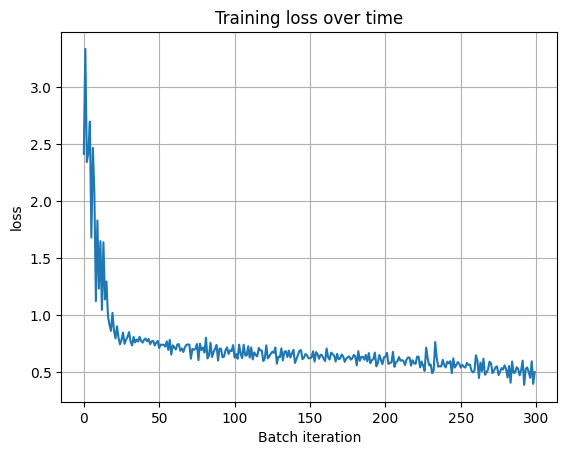

In [77]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training loss over time")
plt.xlabel("Batch iteration")
plt.ylabel("loss")
plt.grid(True)
plt.show()